<a href="https://colab.research.google.com/github/pasumarthi/EVA/blob/master/Session5/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import Libraries and modules**

MaxPooling,Dropout 1*1,Batch Normalization,ModelCheckpoint Learning rate

In [0]:
# https://keras.io/
#!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D,Convolution2D
from keras.utils import np_utils
from keras.optimizers import Adam

from keras.regularizers import l2

from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from matplotlib import pyplot
from keras.callbacks import ReduceLROnPlateau

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


(60000, 28, 28)


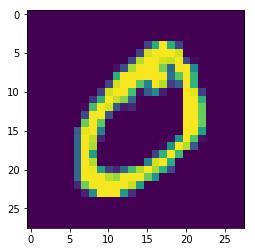

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])


In [0]:
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))

Statistics train=33.318 (78.567), test=33.791 (79.172)


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Architecture

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Conv2D(8,(3, 3), activation='relu', input_shape=(28,28,1))) #26

model.add(Conv2D(16,(3, 3), activation='relu',kernel_regularizer=l2(0.01))) #24

model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))#12
model.add(Conv2D(8,(1, 1), activation='relu'))#12  


model.add(Conv2D(16,(3,3), activation='relu',kernel_regularizer=l2(0.01))) #10
model.add(BatchNormalization())
model.add(Dropout(0.1))
#model.add(Conv2D(16, (3, 3), activation='relu')) #8
model.add(Conv2D(16, (3, 3), activation='relu',kernel_regularizer=l2(0.01))) #8


model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))#4
model.add(Conv2D(8,(1, 1), activation='relu'))#4


model.add(Conv2D(16,(3,3), activation='relu')) #2
model.add(Conv2D(10,(2,2)))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_19 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_19 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 12, 12, 8)         136       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 10, 10, 16)        1168      
__________

 ### Learning rate 

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch):
  if (epoch <= 3 ):
   return 0.003
  elif(epoch <=6):
   return 0.002
  elif(epoch <=9):
   return 0.001
  elif(epoch <=15):
   return 0.0005 
  else: 
   return round(0.001 * 1/(1 + 0.319 * epoch), 10)


"""
  elif(epoch <=20):
   return 0.000025
  elif(epoch <=25):
   return 0.0000125
  elif(epoch <=30):
   return 0.0000093755
   """
   


'\n  elif(epoch <=20):\n   return 0.000025\n  elif(epoch <=25):\n   return 0.0000125\n  elif(epoch <=30):\n   return 0.0000093755\n   '

### Compile & CallBack

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint
lr1=LearningRateScheduler(scheduler, verbose=1)
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')
#filepath="/content/gdrive/My Drive/EVA/Session5\\weights-improvement-epoch={epoch:03d}--accuracy={val_acc:.2f}.hdf5"
filepath="/content/gdrive/My Drive/EVA/Session5\\saveBest.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, mode='auto', save_best_only=True, save_weights_only=False)

### ImageNormalization

In [0]:
datagen = keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,validation_split=0.1)
datagen.fit(X_train)
datagen.fit(X_test)

train_iterator = datagen.flow(X_train, Y_train, batch_size=128)

test_iterator = datagen.flow(X_test, Y_test, batch_size=128)
#print(len(train_iterator))
#print(len(test_iterator))


### Model Running

In [0]:
model.fit_generator(train_iterator, steps_per_epoch=len(train_iterator), epochs=40, verbose=1, validation_data=test_iterator,
                   validation_steps=len(test_iterator),callbacks=[lr1,checkpoint])


Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 9s 19ms/step - loss: 0.4081 - acc: 0.9140 - val_loss: 0.1775 - val_acc: 0.9653

Epoch 00001: val_acc improved from -inf to 0.96530, saving model to /content/gdrive/My Drive/EVA/Session5\saveBest.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 6s 12ms/step - loss: 0.1412 - acc: 0.9715 - val_loss: 0.1430 - val_acc: 0.9675

Epoch 00002: val_acc improved from 0.96530 to 0.96750, saving model to /content/gdrive/My Drive/EVA/Session5\saveBest.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.003.
469/469 [==============================] - 6s 12ms/step - loss: 0.1225 - acc: 0.9755 - val_loss: 0.2015 - val_acc: 0.9484

Epoch 00003: val_acc did not improve from 0.96750
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.003.
469/469 [=============

### Loading the model weight withBest validation accuarcy

In [0]:
from keras.models import load_model
#load model back
model = load_model(filepath)

### History

In [0]:
#print(hist.history)
print(len(hist.history))
hist.history['acc']
for i in range(len(hist.history)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(hist.history['loss'], color='blue', label='train')
		pyplot.plot(hist.history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(hist.history['acc'], color='blue', label='train')
		pyplot.plot(hist.history['val_acc'], color='orange', label='test')
pyplot.show()


### Commented code

In [0]:

#model.fit(X_train, Y_train, batch_size=256, nb_epoch=20, verbose=1, callbacks=[lr1])
#model.fit_generator(datagen.flow(X_train, Y_train, batch_size=256),
                   # steps_per_epoch=len(X_train) / 32, validation_data=(X_train, Y_train),epochs=20, verbose=1, callbacks=[lr1])
#model.fit_generator(datagen.flow(X_train, Y_train, batch_size=256),
                #    steps_per_epoch=len(X_train) / 32,validation_data=(X_train, Y_train), epochs=10, verbose=1)


#model.fit(X_train, Y_train,batch_size=128,nb_epoch=50,verbose=1,validation_split=0.1)
#validation_data=(X_train, Y_train)
#https://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python/48087308
#https://mc.ai/data-augmentation-tasks-using-keras-for-image-data-and-how-to-use-it-in-deep-learning/
#from keras.models import load_model
#model_vgg16 = load_model("saved_model.h5")
#model_vgg16.summary()
#layer_input = model_vgg16.get_layer('vgg16').get_layer(layer_name).input

### Evaluate & Predict 

In [0]:
acc = model.evaluate_generator(test_iterator, steps=len(test_iterator),verbose=1)
print(acc)

79/79 [==============================] - 1s 12ms/step
[0.02741967599093914, 0.9938]


In [0]:
#y_pred = model.predict_generator(datagen.flow(X_test,Y_test,batch_size=128),steps=len(test_iterator),verbose=1)
y_pred = model.predict_generator(test_iterator, steps=len(test_iterator),verbose=1))
y_pred_label=np.argmax(y_pred,axis=1)
y_test_label=np.argmax(Y_test,axis=1)
print(y_pred)

79/79 [==============================] - 1s 11ms/step
[[1.4676338e-07 2.2539248e-04 9.9829394e-01 ... 1.4800952e-03
  8.9107040e-08 4.9158379e-11]
 [1.5772595e-05 3.0156752e-11 2.3969790e-08 ... 8.8805518e-15
  3.2619580e-05 2.7539800e-06]
 [2.8412540e-05 1.7523389e-08 1.3894484e-07 ... 1.3660580e-13
  4.7305280e-09 2.6232707e-09]
 ...
 [1.0636952e-09 1.9892588e-12 2.0849664e-06 ... 3.7066007e-11
  9.9999738e-01 8.7871740e-08]
 [9.9981445e-01 8.0723321e-09 2.8507466e-06 ... 2.5819626e-09
  3.7497630e-06 1.9133195e-05]
 [2.8005684e-06 8.3331184e-07 1.5353789e-05 ... 2.0168627e-09
  1.6683365e-05 4.9783786e-08]]


In [0]:
y_pred = model.predict(X_test)
y_pred_label=np.argmax(y_pred,axis=1)
y_test_label=np.argmax(Y_test,axis=1)
print(y_pred)

[[0.0000000e+00 0.0000000e+00 1.6249353e-26 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.3208295e-21 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.7757066e-32 0.0000000e+00 1.5000666e-38 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


###  Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred_label,y_test_label)
cm


array([[131,  52,   0,   0,   1,   0,  81,   0,   1,   1],
       [  0, 674,   0,   0,   1,   0,   6,   3,   1,   2],
       [766, 260, 974,  77,  87,  24,  87, 215, 132,  28],
       [ 43,  72,  58, 908,   1,  25,  77,  60,  91,  30],
       [  0,   0,   0,   0, 766,   1,   0,   0,   2,  74],
       [ 40,  52,   0,  25,  68, 820, 141,  22,  33,  80],
       [  0,   7,   0,   0,   1,   0, 553,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 724,   0,  14],
       [  0,  18,   0,   0,  20,  22,  13,   3, 714,  75],
       [  0,   0,   0,   0,  37,   0,   0,   1,   0, 705]])

In [0]:
np.sum(np.diagonal(cm))

6969

In [0]:
#number of misclassified
np.sum(cm)-np.sum(np.diagonal(cm))

3031

In [0]:
misclassified = np.where(y_test_label != y_pred_label)
X_testmis1 = X_test[y_test_label != y_pred_label]
len(X_testmis1)

3031

In [0]:
j,t = 0, 0
X_test_wrong = []
for i in range(len(X_test)):
  xx = X_test[i].reshape(1, 28, 28,1)
  t += 1
  if (y_pred_label[i] != y_test_label[i]):
    X_test_wrong.append((xx, y_pred_label[i], y_test_label[i]))
    j += 1
  if j >= 25:
    break
print('total false preds {} for samples {}'.format(j,t))




total false preds 25 for samples 94


### 25 Mis-Classified images

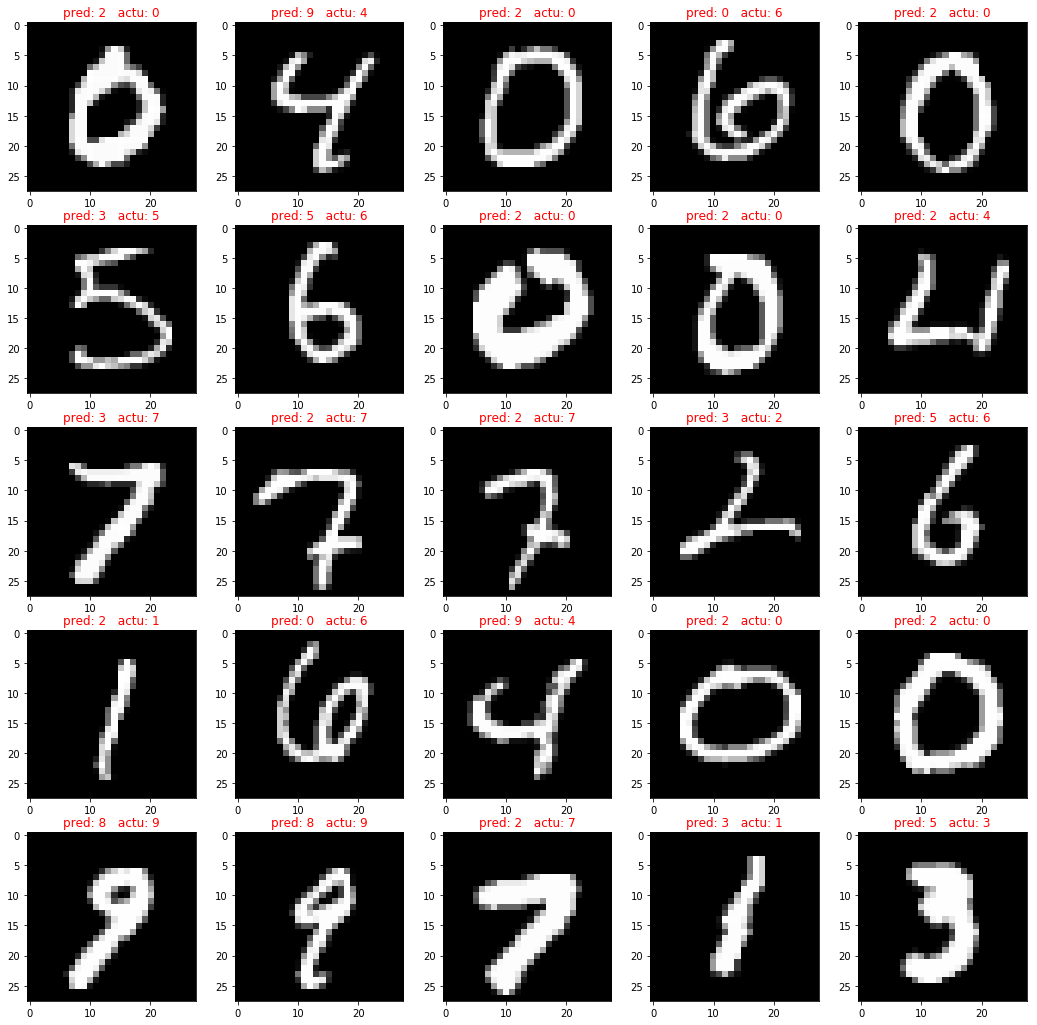

In [0]:
#Plotting misclassified examples
plt.figure(figsize=(18,18))
k = 0
for i in range(len(X_test)):
  if (y_pred_label[i] != y_test_label[i]):
    ax = plt.subplot(5,5,k+1)
    ax.set_title("pred: {}   actu: {}".format(y_pred_label[i], y_test_label[i]), color='r')
    plt.imshow(np.reshape(X_test[i], (28,28)), cmap=plt.cm.gray)
    k += 1
  if k==25:
    break